In [2]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(class_num)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
10


In [14]:
#model 1
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
#model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                      

In [15]:
seed=21
numpy.random.seed(seed)
history = model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 115s 145ms/step - loss: 1.5556 - accuracy: 0.4459
Epoch 2/25
782/782 [==============================] - 119s 153ms/step - loss: 1.1136 - accuracy: 0.6101
Epoch 3/25
782/782 [==============================] - 123s 158ms/step - loss: 0.9593 - accuracy: 0.6643
Epoch 4/25
782/782 [==============================] - 119s 153ms/step - loss: 0.8714 - accuracy: 0.6994
Epoch 5/25
782/782 [==============================] - 114s 146ms/step - loss: 0.8089 - accuracy: 0.7191
Epoch 6/25
782/782 [==============================] - 114s 146ms/step - loss: 0.7577 - accuracy: 0.7365
Epoch 7/25
782/782 [==============================] - 115s 147ms/step - loss: 0.7168 - accuracy: 0.7528
Epoch 8/25
782/782 [==============================] - 113s 144ms/step - loss: 0.6825 - accuracy: 0.7625
Epoch 9/25
782/782 [==============================] - 113s 145ms/step - loss: 0.6618 - accuracy: 0.7705
Epoch 10/25
782/782 [==============================] - 114s 145m

In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.50%


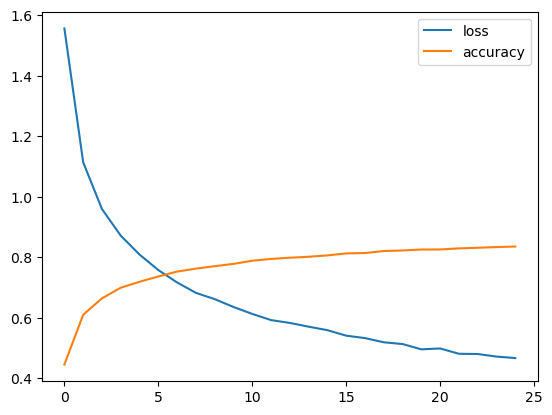

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [18]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 141s 180ms/step - loss: 0.4577 - accuracy: 0.8385 - val_loss: 0.5127 - val_accuracy: 0.8284
Epoch 2/25
782/782 [==============================] - 134s 172ms/step - loss: 0.4501 - accuracy: 0.8420 - val_loss: 0.5482 - val_accuracy: 0.8180
Epoch 3/25
782/782 [==============================] - 129s 165ms/step - loss: 0.4537 - accuracy: 0.8413 - val_loss: 0.5250 - val_accuracy: 0.8272
Epoch 4/25
782/782 [==============================] - 125s 160ms/step - loss: 0.4438 - accuracy: 0.8442 - val_loss: 0.5097 - val_accuracy: 0.8296
Epoch 5/25
782/782 [==============================] - 125s 159ms/step - loss: 0.4360 - accuracy: 0.8464 - val_loss: 0.5383 - val_accuracy: 0.8213
Epoch 6/25
782/782 [==============================] - 124s 158ms/step - loss: 0.4406 - accuracy: 0.8458 - val_loss: 0.5201 - val_accuracy: 0.8310
Epoch 7/25
782/782 [==============================] - 124s 158ms/step - loss: 0.4238 - accuracy: 0.8507 - val_loss: 0.5077 -

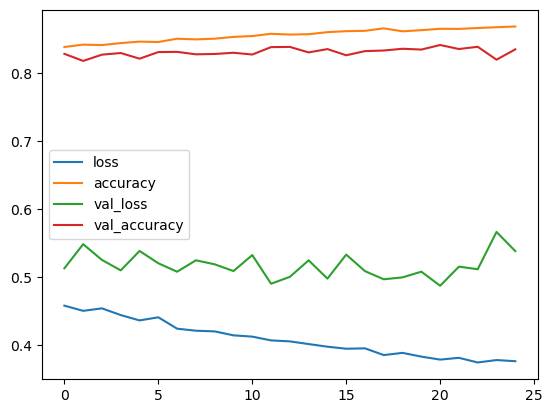

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [24]:
#model 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 64)      

In [26]:
seed=21
numpy.random.seed(seed)
h1 = model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 148s 186ms/step - loss: 1.2248 - accuracy: 0.5894
Epoch 2/25
782/782 [==============================] - 146s 186ms/step - loss: 0.7435 - accuracy: 0.7406
Epoch 3/25
782/782 [==============================] - 145s 186ms/step - loss: 0.5769 - accuracy: 0.8002
Epoch 4/25
782/782 [==============================] - 157s 201ms/step - loss: 0.4461 - accuracy: 0.8448
Epoch 5/25
782/782 [==============================] - 166s 212ms/step - loss: 0.3346 - accuracy: 0.8823
Epoch 6/25
782/782 [==============================] - 157s 200ms/step - loss: 0.2621 - accuracy: 0.9086
Epoch 7/25
782/782 [==============================] - 151s 193ms/step - loss: 0.2083 - accuracy: 0.9269
Epoch 8/25
782/782 [==============================] - 151s 193ms/step - loss: 0.1710 - accuracy: 0.9400
Epoch 9/25
782/782 [==============================] - 151s 194ms/step - loss: 0.1684 - accuracy: 0.9397
Epoch 10/25
782/782 [==============================] - 152s 194m

In [27]:
 model.save('model_noDropout64b25e1024dense'  + '.h5')

In [28]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.71%


In [29]:
#model 3
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

    
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
#model 3
seed=21
numpy.random.seed(seed)
h1 = model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 100s 125ms/step - loss: 1.2714 - accuracy: 0.5741
Epoch 2/25
782/782 [==============================] - 101s 130ms/step - loss: 0.8096 - accuracy: 0.7161
Epoch 3/25
782/782 [==============================] - 97s 124ms/step - loss: 0.6451 - accuracy: 0.7758
Epoch 4/25
782/782 [==============================] - 101s 129ms/step - loss: 0.5421 - accuracy: 0.8119
Epoch 5/25
782/782 [==============================] - 96s 122ms/step - loss: 0.4461 - accuracy: 0.8446
Epoch 6/25
782/782 [==============================] - 96s 123ms/step - loss: 0.3772 - accuracy: 0.8665
Epoch 7/25
782/782 [==============================] - 96s 123ms/step - loss: 0.3099 - accuracy: 0.8926
Epoch 8/25
782/782 [==============================] - 96s 123ms/step - loss: 0.2576 - accuracy: 0.9092
Epoch 9/25
782/782 [==============================] - 98s 126ms/step - loss: 0.2200 - accuracy: 0.9233
Epoch 10/25
782/782 [==============================] - 95s 121ms/step 

In [31]:
model.save('model_3CNNnoDropout64b25e512dense'  + '.h5')

In [32]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.18%


In [6]:
#model 4
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
    
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#model 4
seed=21
numpy.random.seed(seed)
h1 = model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 113s 142ms/step - loss: 1.4639 - accuracy: 0.5052
Epoch 2/25
782/782 [==============================] - 117s 150ms/step - loss: 0.9443 - accuracy: 0.6695
Epoch 3/25
782/782 [==============================] - 110s 140ms/step - loss: 0.7913 - accuracy: 0.7209
Epoch 4/25
782/782 [==============================] - 115s 147ms/step - loss: 0.6963 - accuracy: 0.7562
Epoch 5/25
782/782 [==============================] - 123s 157ms/step - loss: 0.6213 - accuracy: 0.7823
Epoch 6/25
782/782 [==============================] - 113s 145ms/step - loss: 0.5584 - accuracy: 0.8042
Epoch 7/25
782/782 [==============================] - 117s 150ms/step - loss: 0.5000 - accuracy: 0.8236
Epoch 8/25
782/782 [==============================] - 115s 148ms/step - loss: 0.4570 - accuracy: 0.8388
Epoch 9/25
782/782 [==============================] - 113s 145ms/step - loss: 0.4216 - accuracy: 0.8508
Epoch 10/25
782/782 [==============================] - 114s 145m

In [8]:
model.save('model_3CNN64b25e512dense'  + '.h5')

In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.22%


In [10]:
#model 5
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
    
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#model 4
seed=21
numpy.random.seed(seed)
h1 = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 122s 76ms/step - loss: 1.3746 - accuracy: 0.5271
Epoch 2/30
1563/1563 [==============================] - 126s 80ms/step - loss: 0.9463 - accuracy: 0.6679
Epoch 3/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.8232 - accuracy: 0.7127
Epoch 4/30
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7494 - accuracy: 0.7391
Epoch 5/30
1563/1563 [==============================] - 126s 80ms/step - loss: 0.6845 - accuracy: 0.7590
Epoch 6/30
1563/1563 [==============================] - 123s 79ms/step - loss: 0.6358 - accuracy: 0.7774
Epoch 7/30
1563/1563 [==============================] - 129s 82ms/step - loss: 0.5906 - accuracy: 0.7932
Epoch 8/30
1563/1563 [==============================] - 129s 83ms/step - loss: 0.5606 - accuracy: 0.8025
Epoch 9/30
1563/1563 [==============================] - 125s 80ms/step - loss: 0.5283 - accuracy: 0.8147
Epoch 10/30
1563/1563 [==============================] 

In [12]:
model.save('model_3CNN32b30e256dense'  + '.h5')

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.00%


In [14]:
#model 5
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
    
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#model 4
seed=21
numpy.random.seed(seed)
h1 = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 133s 83ms/step - loss: 1.4160 - accuracy: 0.5178
Epoch 2/30
1563/1563 [==============================] - 140s 90ms/step - loss: 0.9422 - accuracy: 0.6707
Epoch 3/30
1563/1563 [==============================] - 142s 91ms/step - loss: 0.8233 - accuracy: 0.7113
Epoch 4/30
1563/1563 [==============================] - 141s 90ms/step - loss: 0.7449 - accuracy: 0.7376
Epoch 5/30
1563/1563 [==============================] - 141s 90ms/step - loss: 0.6760 - accuracy: 0.7647
Epoch 6/30
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6320 - accuracy: 0.7774
Epoch 7/30
1563/1563 [==============================] - 143s 91ms/step - loss: 0.5879 - accuracy: 0.7952
Epoch 8/30
1563/1563 [==============================] - 145s 93ms/step - loss: 0.5571 - accuracy: 0.8047
Epoch 9/30
1563/1563 [==============================] - 140s 89ms/step - loss: 0.5254 - accuracy: 0.8151
Epoch 10/30
1563/1563 [==============================] 

In [14]:
model.save('model_4cnn32b30e256dense'  + '.h5')

In [15]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.47%


In [85]:

categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}




In [22]:
sample_image = X_test[0]
print(sample_image.shape)

(32, 32, 3)


In [87]:
import numpy as np

one_hot = y_test[0] 
index_of_ones = np.where(one_hot == 1)[0]
a=index_of_ones[0]
#print(a)
print("Actual label : %s" % categories[a])
sample_label=categories[a]


Actual label : cat


In [88]:
from tensorflow.keras.models import load_model

m1 = load_model("model_4cnn32b30e256dense.h5")
prediction=np.argmax(m1.predict(sample_image.reshape(-1, *sample_image.shape))[0])

1/1 [==============================] - 0s 189ms/step


In [57]:
print("Predicted label:", categories[prediction])

Predicted label: cat


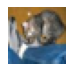

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1),dpi=75)
#plt.figure(dpi=300)
plt.imshow(sample_image)
plt.axis('off')
plt.show()

Transfer learning
